In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer


In [2]:
def normalize(x):
  return (x - x.min()) / (x.max() - x.min())

In [3]:
def pred(x, w, b):
  return 1 / (1 + np.e ** (-(np.dot(x, w) + b)))

In [4]:
def cost(y, y_pred):
  return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [6]:
def train_test_split(x, y, test_split=0.2):
  m = x.shape[0]
  train_size = int((1 - test_split) * m)

  x_train = x[:train_size]
  y_train = y[:train_size]
  x_test = x[train_size:]
  y_test = y[train_size:]

  return x_train, x_test, y_train, y_test

In [16]:
def gradient_descent(x, y, w, b, alpha, epochs=100_000):
  n = x.shape[1]

  if n != w.shape[0]:
    return ValueError("Number of weights must be equal to number of features")

  x_cost = []
  num_epochs = []

  for epoch in range(epochs):
    y_pred = pred(x, w, b)
    error = y_pred - y

    dw = (1 / n) * np.dot(x.T, error)
    db = (1 / n) * np.sum(error)

    w -= alpha * dw
    b -= alpha * db

    if epoch % 1000 == 0:
      print(f'Epoch: {epoch}  ---- Cost: {cost(y, y_pred)}')

    x_cost.append(cost(y, y_pred))
    num_epochs.append(epoch)

  plt.figure(figsize=(10, 5))
  plt.plot(num_epochs, x_cost)
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Cost vs Epochs')
  plt.grid()
  plt.show()
  return w, b


In [9]:
df = load_breast_cancer(as_frame=True)

x = df.data
x = normalize(x)
x = x.sample(frac=1).reset_index(drop=True)

y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.2)

Epoch: 0  ---- Cost: 0.6931471805599453
Epoch: 1000  ---- Cost: 0.6650800191645918
Epoch: 2000  ---- Cost: 0.6617112498627532
Epoch: 3000  ---- Cost: 0.6599446045377458
Epoch: 4000  ---- Cost: 0.6588719430691269
Epoch: 5000  ---- Cost: 0.6581459070163749
Epoch: 6000  ---- Cost: 0.6576107007397681
Epoch: 7000  ---- Cost: 0.6571884773976603
Epoch: 8000  ---- Cost: 0.6568373952336093
Epoch: 9000  ---- Cost: 0.6565337735742495


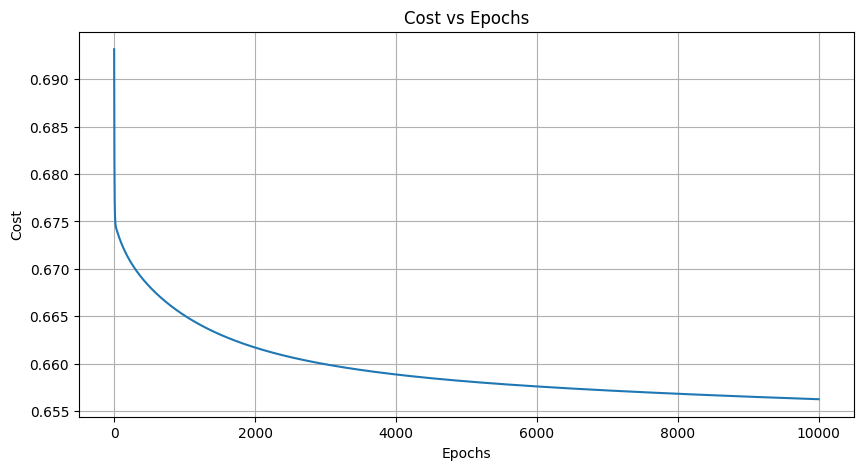

In [17]:
w = np.zeros(x.shape[1])
b = 0
alpha = 0.01
epochs = 10_000
w, b = gradient_descent(x_train, y_train, w, b, alpha, epochs)

In [18]:
print(cost(y_train, pred(x_train, w, b)))
print(cost(y_test, pred(x_test, w, b)))

0.6562636474110658
0.6181517214360024
